In [16]:
from pandas.plotting import register_matplotlib_converters
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
register_matplotlib_converters()

In [21]:
data_path = 'data/'
tasks = ['PEMS03', 'PEMS04', 'PEMS07', 'PEMS08']
# history_period = [12, 48]
history_period = [7, 12]

In [22]:
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
    print(data['data'].shape)

(26208, 358)
(16992, 307)
(28224, 883)
(17856, 170)


In [23]:
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
    history_data = np.zeros((data['data'].shape[0], len(history_period), data['data'].shape[1]))
    data = data['data']
    for period in history_period:
        print('task: {}, period: {}'.format(task, period))
        data_new = []
        for i in tqdm(range(data.shape[1])):
            data_new.append([])
            for j in range(data.shape[0]):
                # avoid data leakage
                if j < int(data.shape[0] * 0.6):
                    if j < period:
                        start = 0
                        end = j + 1
                    else:
                        start = j - period + 1
                        end = j + 1
                elif j < int(data.shape[0] * 0.8):
                    if j < period + int(data.shape[0] * 0.6):
                        start = int(data.shape[0] * 0.6)
                        end = j + 1
                    else:
                        start = j - period + 1
                        end = j + 1
                else:
                    if j < period + int(data.shape[0] * 0.8):
                        start = int(data.shape[0] * 0.8)
                        end = j + 1
                    else:
                        start = j - period + 1
                        end = j + 1
                data_new[i].append(np.mean(data[start:end, i]))
                
        data_new = np.array(data_new)
        history_data[:, history_period.index(period), :] = data_new.T
    np.savez(data_path + os.sep + task + os.sep + task + '_history_flow.npz', data=history_data)

task: PEMS03, period: 7


100%|██████████| 358/358 [00:56<00:00,  6.29it/s]


task: PEMS03, period: 12


100%|██████████| 358/358 [00:57<00:00,  6.24it/s]


task: PEMS04, period: 7


100%|██████████| 307/307 [00:31<00:00,  9.67it/s]


task: PEMS04, period: 12


100%|██████████| 307/307 [00:32<00:00,  9.59it/s]


task: PEMS07, period: 7


100%|██████████| 883/883 [02:31<00:00,  5.83it/s]


task: PEMS07, period: 12


100%|██████████| 883/883 [02:32<00:00,  5.80it/s]


task: PEMS08, period: 7


100%|██████████| 170/170 [00:18<00:00,  9.26it/s]


task: PEMS08, period: 12


100%|██████████| 170/170 [00:18<00:00,  9.21it/s]


In [25]:
for task in tasks:
    data = np.load(data_path + os.sep + task + os.sep + task + '_history_flow.npz')
    print(data['data'].shape)
    

(26208, 2, 358)
(16992, 2, 307)
(28224, 2, 883)
(17856, 2, 170)


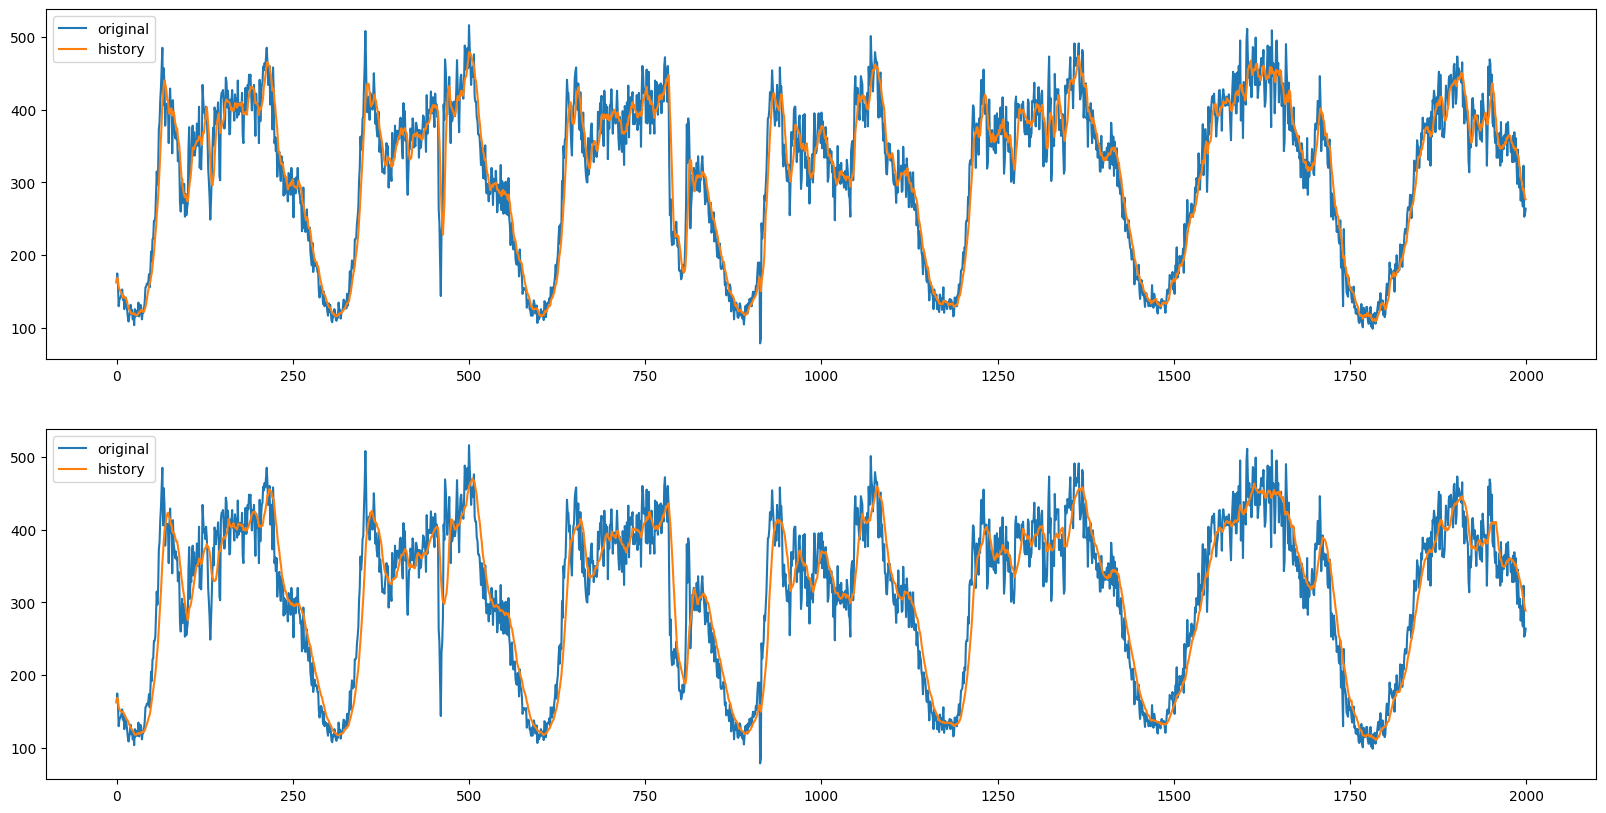

In [27]:
task = 'PEMS07'
data = np.load(data_path + os.sep + task + os.sep + task + '_flow.npz')
data = data['data']
data_history = np.load(data_path + os.sep + task + os.sep + task + '_history_flow.npz')
data_history = data_history['data']
state = 102
example_len = 2000

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(data[:example_len, state], label='original')
plt.plot(data_history[:example_len, 0, state], label='history')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data[:example_len, state], label='original')
plt.plot(data_history[:example_len, 1, state], label='history')
plt.legend()
plt.show()